In [ ]:
- title: Занятие 9
- author: Dmitrii Kononov
- date: 2023-3-29
- status:
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10206
- test_comment: Задание №6    
- slug: s2_lab09
- ipynb_url: download/s2_lab09.ipynb

# Занятие 9: Связные списки и двоичные деревья.

## Цели работы
1. Связные списки.
2. Деревья.
3. Двоичные деревья поиска.

## Связный список
**Связный список** – это структура данных, которая состоит из *ячеек* (*узлов*), содержащих хранимую в списке информацию и ссылку на следующую ячейку.  

Удобство связного списка заключается в постоянном времени операции вставки и удаления отдельного элемента (*узла*): асимптотика этих операций равна $O(1)$ (для структуры `list` длины `n` асимптотика данных операций равна $O(n)$).

Первый узел в связном списке называется *головой* списка.

**Однонаправленным** связным (**односвязным**) списоком называется список, каждый узел которого связан только со следующим узлом: хранит ссылку только на следующий узел.

В **двунаправленных** списках ссылки ячеек указывают на следующий и предыдущий узлы. 

На языке `Python` односвязный список можно реализовать с помощью *словаря*:
```python
L = {
        'head': None,
        'size': 0,
    }
```
- `head` содержит головной узел списка `L`
- `size` хранит текущий размер списка.

Также на основе *словаря* можно создать `узел` списка:
```python
   node = {
        'value': x,
        'next': None
    }
```
- `value` содержит произвольного типа значение узла
- `next` содержит ссылку на следующий узел списка или `None`, если данный узел является концевым.

У определенного выше пустого списка `L` голова является концом, а размер равен `0`.

**Задание 1** – Для определенных выше списка `L` и узла `node` создайте:
- `list_create()` - конструктор списка, который создаёт и возвращает пустой список
- `list_add(L, value)` - функция, добавляет узел со значением `value` в начало списка `L`

## Деревья
**Дерево** состоит из *вершин* (*узлов*), которые содержат данные (ключи) и соединяются *ветвями*. Ветви изображают в виде стрелок, ведущих от родительской вершины к дочерней.

**Корневой** называется вершина, не имеющая родителя.

У каждой вершины, за исключением **корневой**, есть одна родительская вершина. Дочерние вершины дочерних вершин называют **потомками**, а родительские вершины родительских вершин — **предками**. 

Вершины, не имеющие потомков называются **листьями**.

Деревья предназначены, в первую очередь, для представления иерархических структур.

## Двоичные деревья поиска
Дерево называется **двоичным**, если каждый его узел имеет не более двух прямых потомков: левый и правый. 

Двоичное дерево называется **деревом двоичного поиска** (**binary search tree**), если для каждого узла `x` все ключи в левом поддереве, чем ключ в `x`, а все ключи в правом поддереве больше, чем ключ в `x`. Это свойство упорядоченности отличает дерево двоичного поиска от любого другого типа двоичных деревьев.

Упорядоченность ключей позволяет реализовать в двоичном дереве поиска **упорядоченный** обход: посещение всех узлов в ветви левого прямого потомка до посещения корня, а затем – все узлы в ветви правого прямого потомка после посещения корня. Результатом является обход узлов в отсортированном порядке в соответствии с упорядоченностью ключей.

Реализовать структуру данных "двоичное дерево" можно на основе `классов`: нам их понадобится два:
- класс Node для представления узла дерева
- класс Tree для представления *двоичного дерева*

Ниже приведено описание класса `Node`:

```python
class Node:
    def __init__(self, data):
        self.data = data # Данные, хранящиеся в узле
        self.left = None # Левый потомок. None, если ребенка нет
        self.right = None # Правый потомок. None, если ребенка нет
```
Для создания экземпляра `node` класса `Node`, хранящего значение `2` необходимо выпонить код в ячейке ниже:

In [1]:
class Node:
    def __init__(self, data):
        self.data = data # Данные, хранящиеся в узле
        self.left = None # Левый потомок. None, если ребенка нет
        self.right = None # Правый потомок. None, если ребенка нет

node = Node(2)

Результат (в памяти) выполнеения кода выше приведен на рисунке:
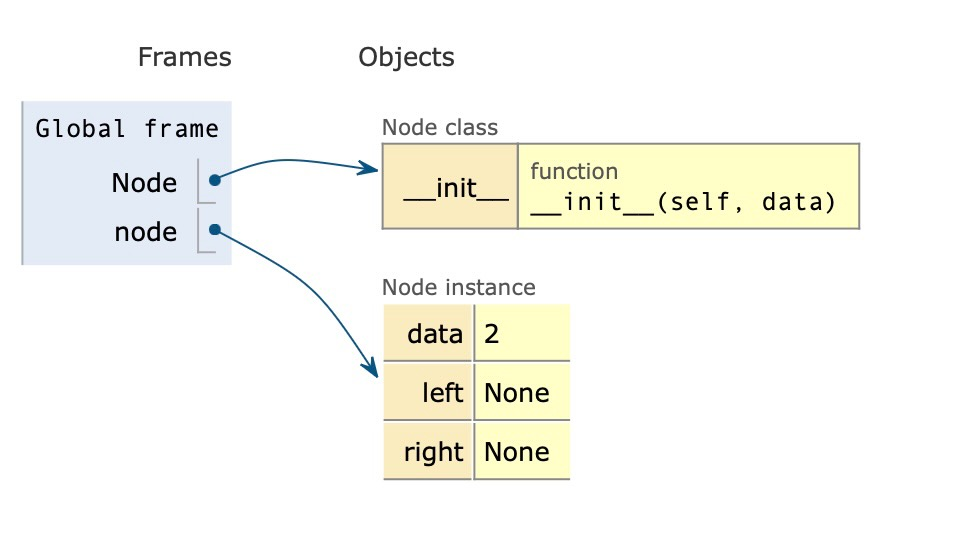

Ниже код определения класса `Tree`:
```python
class Tree:
    def __init__(self):
        self.root = None # Корневой узел. None, если корень не определен 
```
Данное определение класса очевидно бесполезно, так как отсутствуют методы (функции) класса для построения и отображения дерева.

Дополним его определив метод `add(data)`, который позволит добавить в дерево узел, хранящий данные `data`:
```python
class Tree:
    def __init__(self):
        self.root = None # Корневой узел. None, если корень не определен 

    def add_at(self, node, data):
        if node.data == data: # Узел с таким значением уже существует: ничего не делаем
            return

        if data < node.data: # Спускаемся влево
            if node.left is None:
                node.left = Node(data)
            else:
                self.add_at(node.left, data)
        else: # Спускаемся вправо
            if node.right is None:
                node.right = Node(data)
            else:
                self.add_at(node.right, data)

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
            return

        self.add_at(self.root, data)
```
Поясним код. Бинарное дерево достраивается спуском по дереву; на каждом шаге спуска выбирается соотвествующая левая или правая ветка (в зависимости от того, меньше или больше значение `data` нового узла значения `data`, хранящегося в текущем узле дерева), пока не найдется место для вставки новой вершины (т.е ссылка на нужную ветвь равна None). Новая вершина добавляется как лист дерева, т.е. указатели на дочерние вершины `left` и `right` равны None. Если элемент уже существует в дереве, добавлять его не надо. Спуск по дереву реализован с помощью рекурсивного метода `add_at()`. 

Создадим дерево с узлами, хранящеми значения `3, 2, 1, 9, 5, 4, 6, 8` (выполните код в ячейке ниже):

In [3]:
class Node:
    def __init__(self, data):
        self.data = data # Данные, хранящиеся в узле
        self.left = None # Левый потомок. None, если ребенка нет
        self.right = None # Правый потомок. None, если ребенка нет

class Tree:
    def __init__(self):
        self.root = None # Корневой узел. None, если корень не определен 

    def add_at(self, node, data):
        if node.data == data: # Узел с таким значением уже существует: ничего не делаем
            return

        if data < node.data: # Спускаемся влево
            if node.left is None:
                node.left = Node(data)
            else:
                self.add_at(node.left, data)
        else: # Спускаемся вправо
            if node.right is None:
                node.right = Node(data)
            else:
                self.add_at(node.right, data)

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
            return

        self.add_at(self.root, data)

tree = Tree()
for x in [3, 2, 1, 9, 5, 4, 6, 8]:
    tree.add(x)

Результат (в памяти) выполнеения кода выше приведен на рисунке:
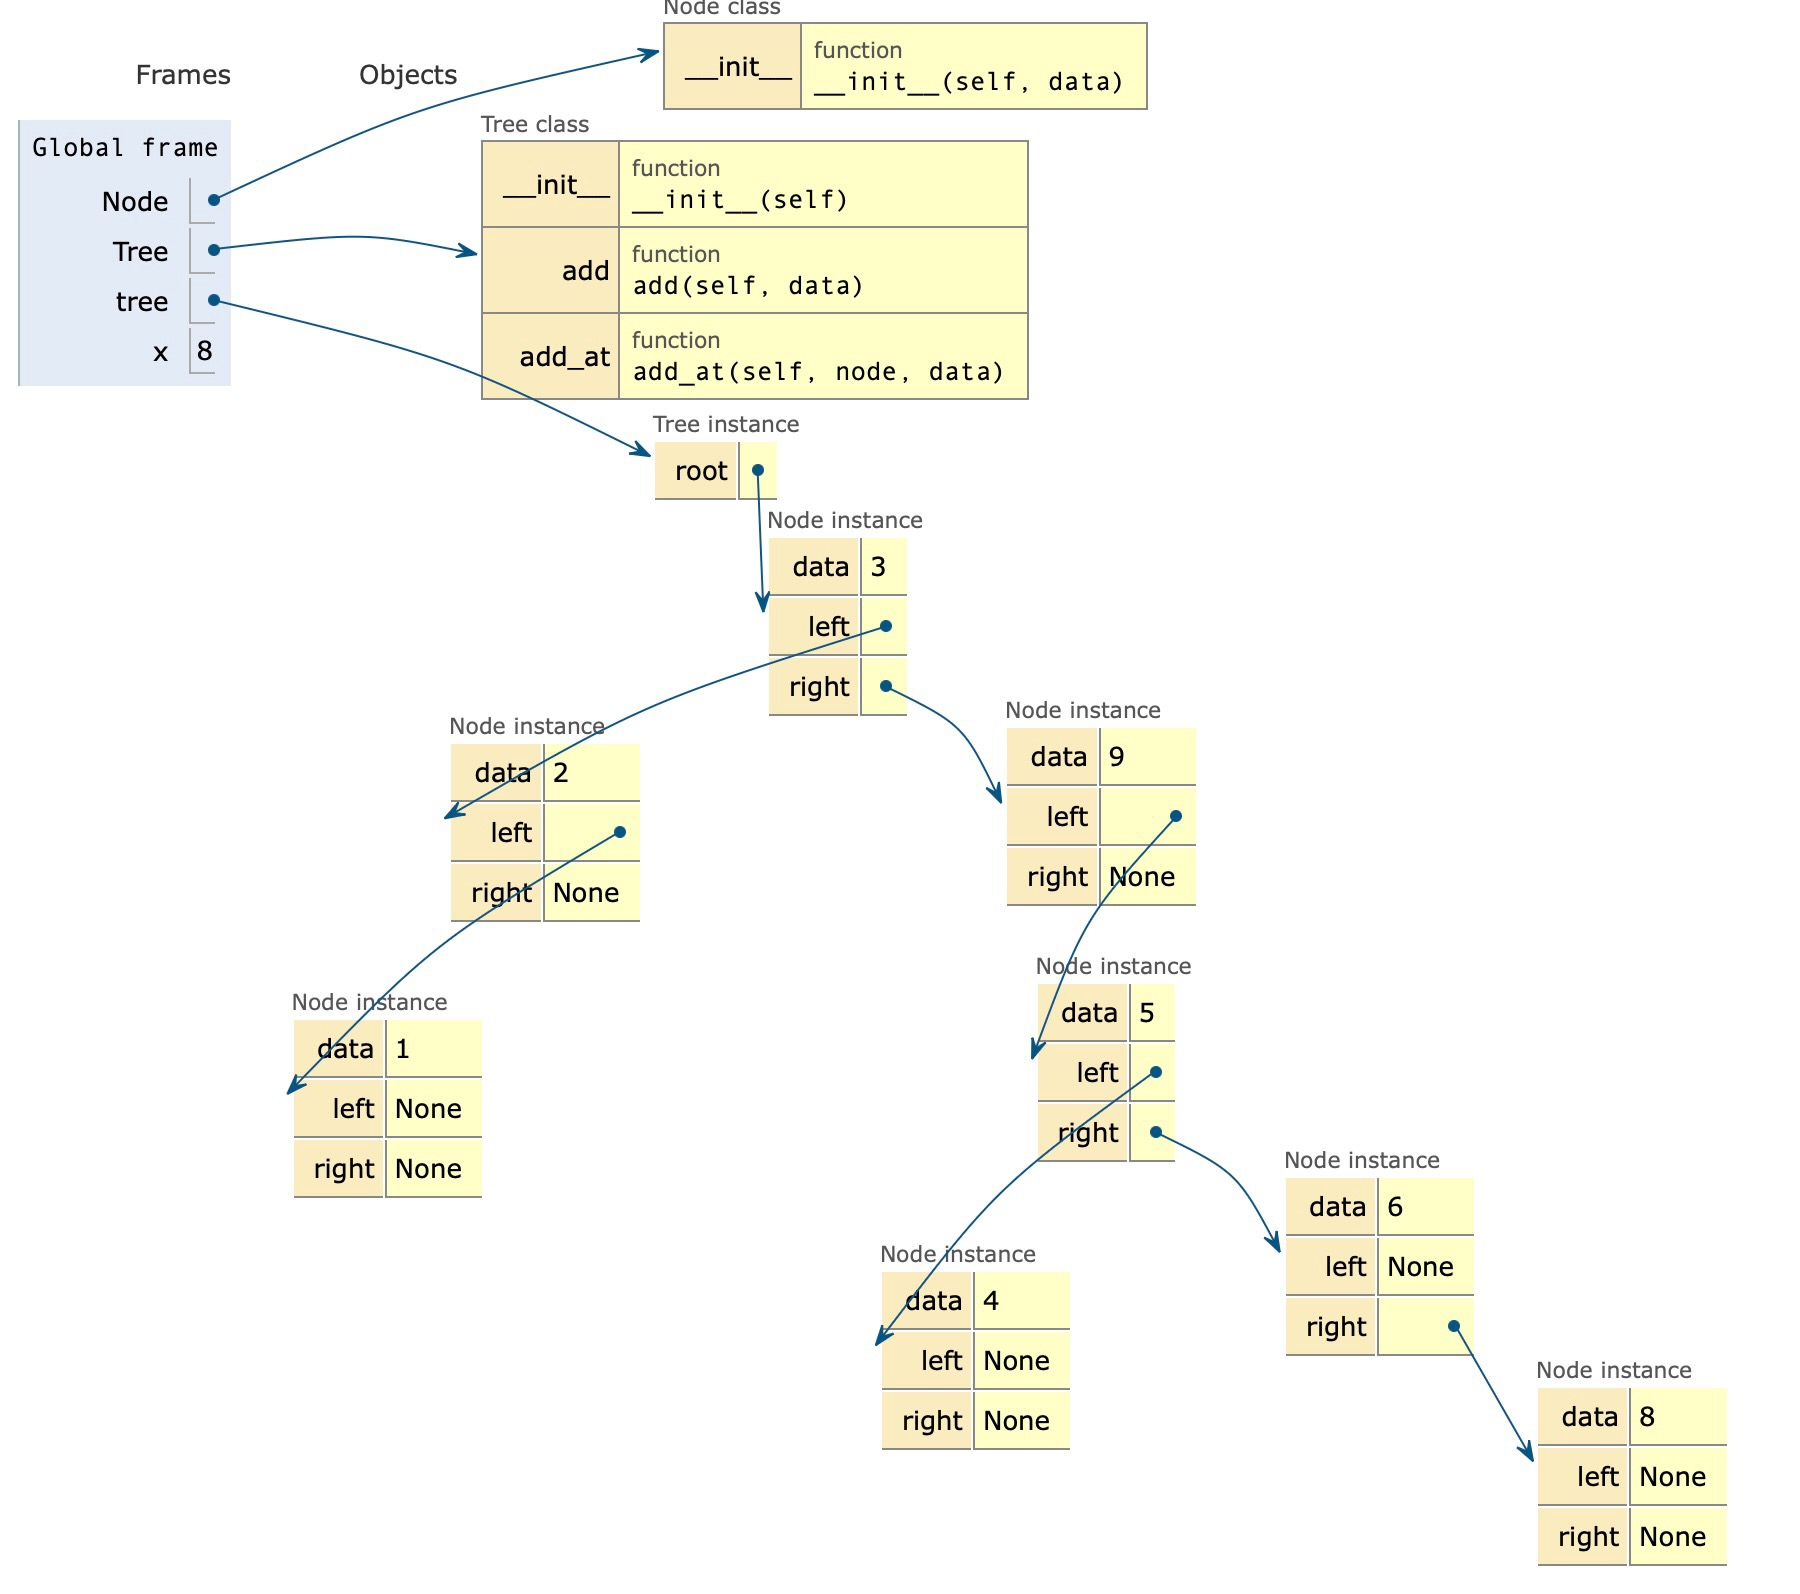

Для того, чтобы иметь возможность выводить дерево на экран реализукем метод `print()`. Код метода `print()` реализует обход дерева в глубину слева направо, печатая значения `data`, хранящиеся в узлах, через пробел. Вызывает функцию печати левого поддерева, печатает значение в узле, вызывает функцию печати правого поддерева.

Определение класса примет следующий вид:
```python
class Tree:
    def __init__(self):
        self.root = None # Корневой узел. None, если корень не определен 

    def add_at(self, node, data):
        if node.data == data: # Узел с таким значением уже существует: ничего не делаем
            return

        if data < node.data: # Спускаемся влево
            if node.left is None:
                node.left = Node(data)
            else:
                self.add_at(node.left, data)
        else: # Спускаемся вправо
            if node.right is None:
                node.right = Node(data)
            else:
                self.add_at(node.right, data)

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
            return

        self.add_at(self.root, data)

    def print(self, node=None):
        if node is None:
            if self.root is None:
                return
            node = self.root

        if node.left is not None:
            self.print(node.left)
            print(' ', end='')

        print(node.data, end='')

        if node.right is not None:
            print(' ', end='')
            self.print(node.right)
```
Код в ячейке ниже создает и выводит на экран двоичное дерево с ключами `7, 3, 2, 1, 9, 5, 4, 6, 8` при помощи методов `add()` и `print()`. Выполните его.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data # Данные, хранящиеся в узле
        self.left = None # Левый потомок. None, если ребенка нет
        self.right = None # Правый потомок. None, если ребенка нет

class Tree:
    def __init__(self):
        self.root = None # Корневой узел. None, если корень не определен 

    def add_at(self, node, data):
        if node.data == data: # Узел с таким значением уже существует: ничего не делаем
            return

        if data < node.data: # Спускаемся влево
            if node.left is None:
                node.left = Node(data)
            else:
                self.add_at(node.left, data)
        else: # Спускаемся вправо
            if node.right is None:
                node.right = Node(data)
            else:
                self.add_at(node.right, data)

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
            return

        self.add_at(self.root, data)
        
    def print(self, node=None):
        if node is None:
            if self.root is None:
                return
            node = self.root

        if node.left is not None:
            self.print(node.left)
            print(' ', end='')

        print(node.data, end='')

        if node.right is not None:
            print(' ', end='')
            self.print(node.right)


tree = Tree()
for x in [7, 3, 2, 1, 9, 5, 4, 6, 8]:
    tree.add(x)
    
tree.print()